In [1]:
import pandas as pd
import matplotlib.cm as cm

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1">Loading Data</a></span><ul class="toc-item"><li><span><a href="#Minor-Data-Manipulation" data-toc-modified-id="Minor-Data-Manipulation-1.1">Minor Data Manipulation</a></span></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2">Exploration</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2.1">Time Series Analysis</a></span></li><li><span><a href="#Basics" data-toc-modified-id="Basics-2.2">Basics</a></span></li></ul></li><li><span><a href="#Looking-into-Features" data-toc-modified-id="Looking-into-Features-3">Looking into Features</a></span></li></ul></div>

# Loading Data

In [4]:
items = pd.read_csv('data/items.csv')
holiday = pd.read_csv('data/holidays_events.csv')
oil = pd.read_csv('data/oil.csv')
stores = pd.read_csv('data/stores.csv')
transactions = pd.read_csv('data/transactions.csv')
train_set = pd.read_csv('data/train.csv')

/Users/lizkalina/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
transactions = pd.read_csv('data/transactions.csv')

In [6]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [7]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Minor Data Manipulation

In [11]:
train = train_set.merge(items,on='item_nbr')

In [12]:
train = train.merge(stores,on='store_nbr')

In [13]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
1,19811,2013-01-02,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
2,100696,2013-01-04,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
3,141831,2013-01-05,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
4,183815,2013-01-06,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1


# Exploration

In [14]:
items.groupby('family')['item_nbr'].count().sort_values(ascending=False)

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
AUTOMOTIVE                      20
LINGERIE                        20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

## Time Series Analysis

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,store_nbr):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(10,3))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    plt.savefig('plots/time_series_analysis/{}'.format(store_nbr))
    plt.close()

/Users/lizkalina/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
#transactions.index = pd.to_datetime(transactions.date)
#transactions = transactions[['store_nbr','transactions']]

In [17]:
for store_nbr in transactions.store_nbr.unique():
    ts = transactions[transactions.store_nbr == store_nbr][['transactions']]
    #test_stationarity(ts, store_nbr)

### Modelling Seasonality

In [18]:
test = transactions.copy()
test['date'] = pd.to_datetime(test['date'])
test = test.set_index('date')

In [19]:
test = pd.DataFrame(test.groupby(pd.TimeGrouper('M')).transactions.sum())

In [20]:
test.reset_index(inplace=True)
test['date'] = pd.to_datetime(test['date'])
test = test.set_index('date')

In [21]:
test[0:12]

,transactions
date,
2013-01-31,2289558
2013-02-28,2169615
2013-03-31,2458683
2013-04-30,2344905
2013-05-31,2467465
2013-06-30,2392206
2013-07-31,2401968
2013-08-31,2461139
2013-09-30,2380462


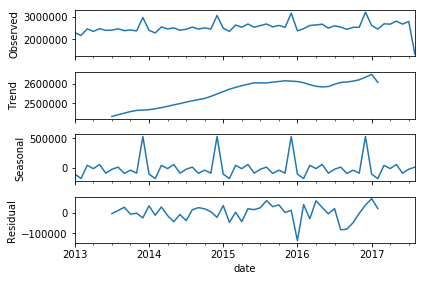

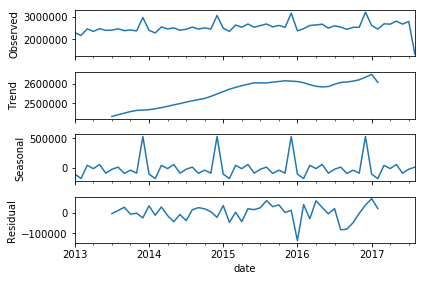

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(test.transactions, model='additive',freq=12)
result.plot()

## Basics

## Grocery Spending v. Oil Prices

In [23]:
oil.index = pd.to_datetime(oil.date)

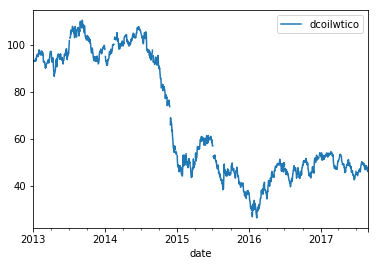

In [24]:
oil[['dcoilwtico']].plot()

In [25]:
trend = pd.DataFrame(result.trend)
oil_v_trend = trend.merge(oil, left_index=True,right_index=True)
sub = oil_v_trend[['transactions','dcoilwtico']].dropna()

In [26]:
from scipy.stats.stats import pearsonr

# inverse relationship between oil prices and grocery spending?
pearsonr(sub['dcoilwtico'].values,sub['transactions'].values)

(-0.93597009328910707, 1.112643611813543e-14)

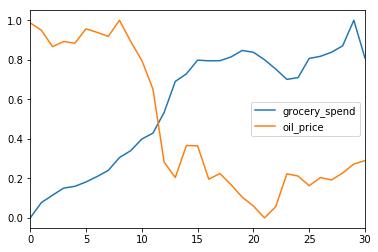

In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(sub)
df_normalized = pd.DataFrame(np_scaled,columns=['grocery_spend','oil_price'])
df_normalized.plot()

## Transaction Total by Store over Time

In [28]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.index = transactions['date']
transactions['year'] = transactions['date'].apply(lambda x: x.year)
transactions['month'] = transactions['date'].apply(lambda x: x.month)

In [29]:
monthly_by_store = transactions.groupby(['store_nbr',pd.TimeGrouper('M')])[['transactions']].sum()['transactions']

/Users/lizkalina/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


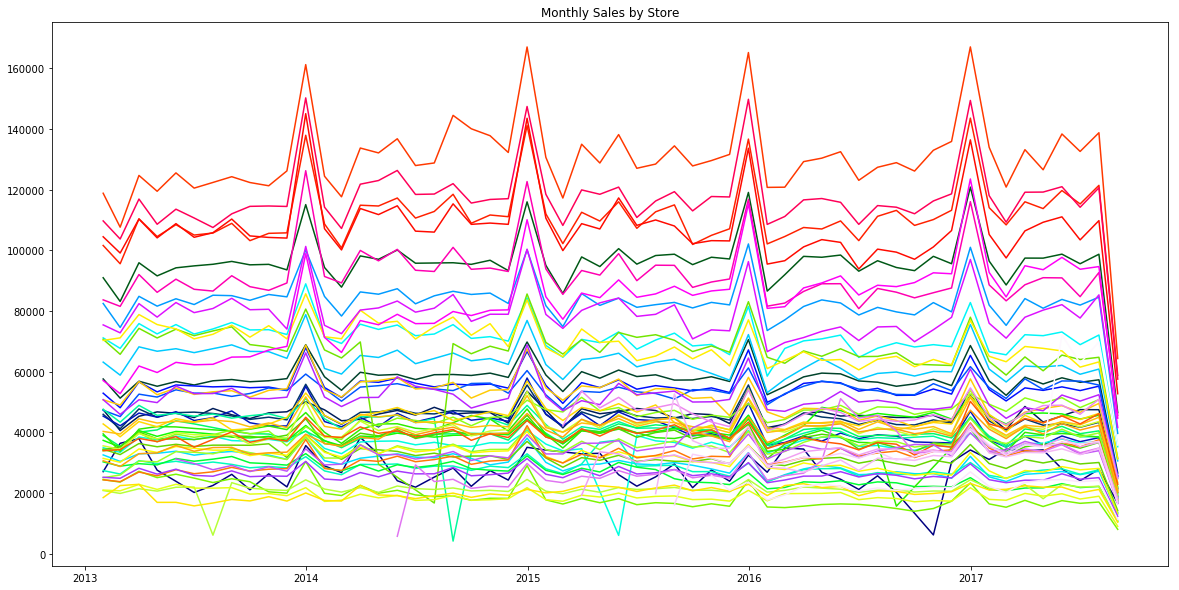

In [30]:
plt.figure(figsize=(20,10))
colormap = plt.cm.gist_ncar
colors = [colormap(i) for i in np.linspace(0, 1,transactions.store_nbr.nunique())]
std_df = {}

for idx,store_nbr in enumerate(transactions.store_nbr.unique()):
    rolstd = pd.rolling_std(monthly_by_store.loc[store_nbr], window=12)
    std_df[store_nbr] = rolstd
    #orig = plt.plot(rolstd,color=colors[idx],label='{}'.format(store_nbr))
    orig = plt.plot(monthly_by_store.loc[store_nbr],color=colors[idx],label='{}'.format(store_nbr))

plt.title('Monthly Sales by Store')
plt.show(block=False)

In [31]:
std_df = pd.DataFrame.from_dict(std_df)

In [32]:
std_medians = std_df.median().sort_values(ascending=False)

In [33]:
# Stores with most volatile monthly sales
stores[stores.store_nbr.isin([44,46,47,45,49,48,50])]

,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14


In [34]:
stores_w_std = stores.merge(pd.DataFrame(std_medians,columns=['avg_std']),left_on='store_nbr',right_index=True)

In [35]:
#stores_w_std.sort_values('avg_std',ascending=False)

# Looking into Features

In [36]:
## Multilayer Perceptron
## Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html

In [37]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
1,19811,2013-01-02,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
2,100696,2013-01-04,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
3,141831,2013-01-05,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
4,183815,2013-01-06,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1


## Create Binary Features for Categorical Variables

In [38]:
encoded = pd.get_dummies(train, columns=['family','city','type','cluster'])

In [39]:
pd.options.display.max_columns =100
encoded.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,state,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,type_A,type_B,type_C,type_D,type_E,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0,2013-01-01,25,103665,7.0,NaN,2712,1,Santa Elena,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19811,2013-01-02,25,103665,5.0,NaN,2712,1,Santa Elena,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100696,2013-01-04,25,103665,5.0,NaN,2712,1,Santa Elena,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,141831,2013-01-05,25,103665,5.0,NaN,2712,1,Santa Elena,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,183815,2013-01-06,25,103665,7.0,NaN,2712,1,Santa Elena,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
encoded['onpromotion'] = encoded.onpromotion.fillna(0).replace(True,1).replace(False,0)

In [41]:
rel_cols = list(set(encoded.columns) - set(['id','date','store_nbr','item_nbr',
                        'unit_sales','class','state']))

In [42]:
feat_set = encoded[rel_cols]

In [43]:
outcome_set = encoded['unit_sales']

In [ ]:
#feat_set.to_csv('data/modified/feature_set.csv')
feat_set = pd.read_csv('data/modified/feature_set.csv')

In [ ]:
#outcome_set.to_csv('data/modified/outcome_set.csv')
outcome_set = pd.read_csv('data/modified/outcome_set.csv')

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from functools import partial

my_score = partial(mutual_info_regression, random_state=0)

skb = SelectKBest(my_score)
skb.fit(feat_set, outcome_set)
#skb.scores_

## SelectPercentile of Features

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif,percentile = 20)
selector.fit(feat_set,outcome_set)
features_transformed = selector.transform(feat_set)

selector_scores = pd.DataFrame(selector.scores_,index=feat_set.columns,columns=['score']) \
                    .sort_values('score',ascending=False)

## Merge in cleaned trend to feature set